# Sensitivity Calibration Examples

In [2]:
%matplotlib widget
import pychaoson.calculate_chaos as calc_chaos
import pychaoson.gui.control_gui as control_gui
import pychaoson.pychaoson as pychaoson
import pychaoson.gui.param_space_gui as param_space_gui
import pychaoson.chaotic_systems as chaotic_systems
import pychaoson.sc_helper as sc_helper
import pychaoson.sensitivity_calibration as sensitivity_calibration
import pychaoson.sliders as sliders
import numpy as np
import sympy as sp
from itertools import product
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from itertools import product
from tqdm import tqdm
from sklearn.cluster import MeanShift, estimate_bandwidth
import cv2

### Example for 1D- Mapping on one dimension with 3 different transforms

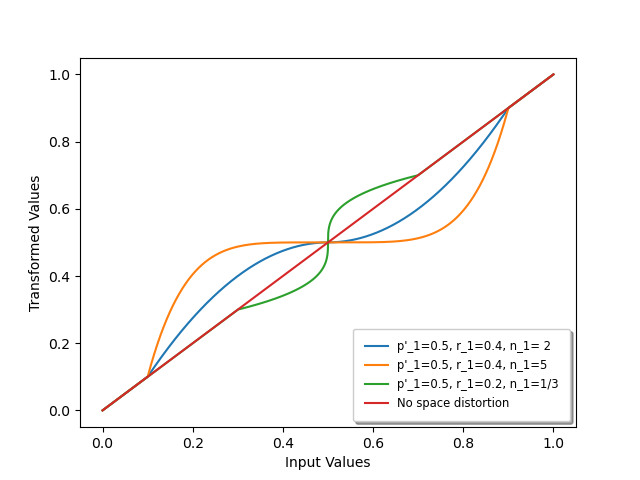

In [44]:
slider = sliders.SlidableParameter(0, 0, 1, 0, False, "Linear Space", [])
poi_list = []
poi_list.append(sensitivity_calibration.PointOfInterest([0.5], radius=0.3, exp=2))
linspace = list(np.linspace(0, 1, num=100000))
transformed_linspace1 = [sensitivity_calibration.transform_custom_values([value], [slider], [sensitivity_calibration.PointOfInterest([0.5], radius=0.4, exp=2)]) for value in linspace]
transformed_linspace3 = [sensitivity_calibration.transform_custom_values([value], [slider], [sensitivity_calibration.PointOfInterest([0.5], radius=0.4, exp=5)]) for value in linspace]
transformed_linspace4 = [sensitivity_calibration.transform_custom_values([value], [slider], [sensitivity_calibration.PointOfInterest([0.5], radius=0.2, exp=3, repelling=True)]) for value in linspace]
plt.figure()
plt.plot(linspace, transformed_linspace1, label='p\'_1=0.5, r_1=0.4, n_1= 2') 
plt.plot(linspace, transformed_linspace3, label='p\'_1=0.5, r_1=0.4, n_1=5') 
plt.plot(linspace, transformed_linspace4, label='p\'_1=0.5, r_1=0.2, n_1=1/3')
plt.plot(linspace, linspace, label='No space distortion') 
plt.xlabel('Input Values')
plt.ylabel('Transformed Values')
plt.legend(
    loc='lower right', 
    title='', 
    frameon=True, 
    shadow=True, 
    borderpad=1.0,  
    fontsize='small'
)

### Example for 1-D Mapping on 2D space

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 22742.88it/s]


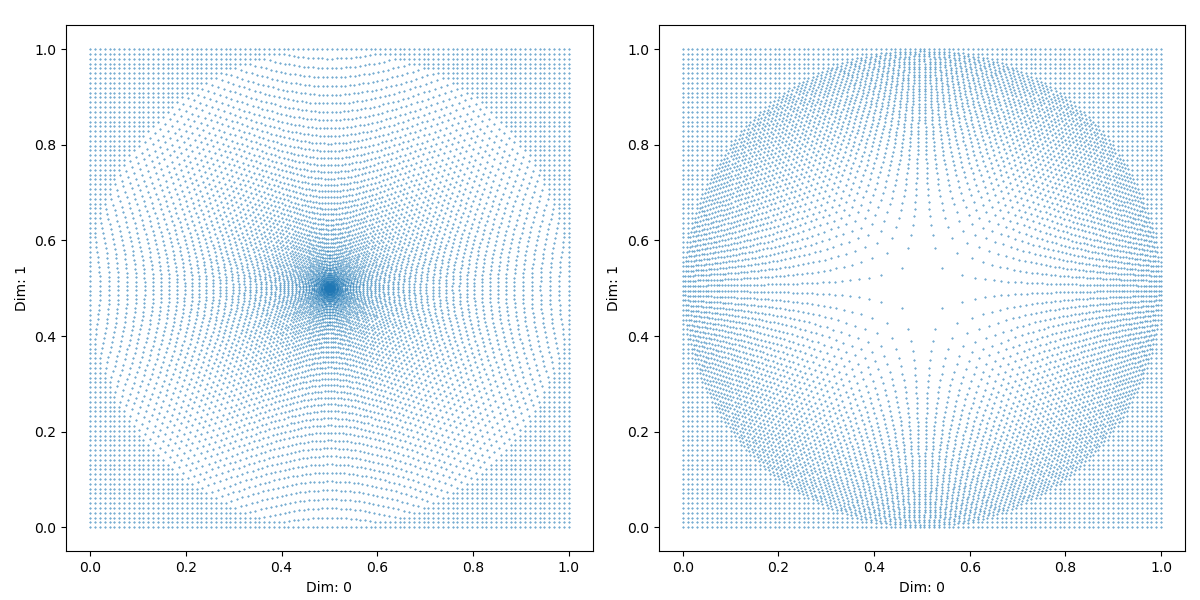

In [3]:
slider1 = sliders.SlidableParameter(0, 0, 1, 0, False, "Linear Space", [])
slider2 = sliders.SlidableParameter(0, 0, 1, 0, False, "Linear Space", [])

linspace = list(np.linspace(0, 1, num=100))
grid = list(product(linspace.copy(), linspace.copy()))
transformed_grid = []
transformed_grid_repelling = []
for point in tqdm(grid):
    transformed_grid.append(sensitivity_calibration.transform_custom_values(point, [slider1, slider2], 
                                                                            [sensitivity_calibration.PointOfInterest([0.5,0.5], radius=0.5, exp=2, repelling=False),                                                                                         ]))
    transformed_grid_repelling.append(sensitivity_calibration.transform_custom_values(point, [slider1, slider2], 
                                                                            [sensitivity_calibration.PointOfInterest([0.5,0.5], radius=0.5, exp=2, repelling=True)]))                        

scatter_x = np.array([grid_point[0] for grid_point in transformed_grid])
scatter_y = np.array([grid_point[1] for grid_point in transformed_grid])

scatter_x_repelling = np.array([grid_point[0] for grid_point in transformed_grid_repelling])
scatter_y_repelling = np.array([grid_point[1] for grid_point in transformed_grid_repelling])


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(scatter_x, scatter_y, s=0.15)
axs[0].set_aspect('equal')
axs[0].set_xlabel('Dim: 0')
axs[0].set_ylabel('Dim: 1')
axs[1].scatter(scatter_x_repelling, scatter_y_repelling, s=0.15)
axs[1].set_aspect('equal')
axs[1].set_xlabel('Dim: 0')
axs[1].set_ylabel('Dim: 1')
plt.tight_layout()
plt.show()

# 2-D Example 1-D Mapping

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 32234.37it/s]


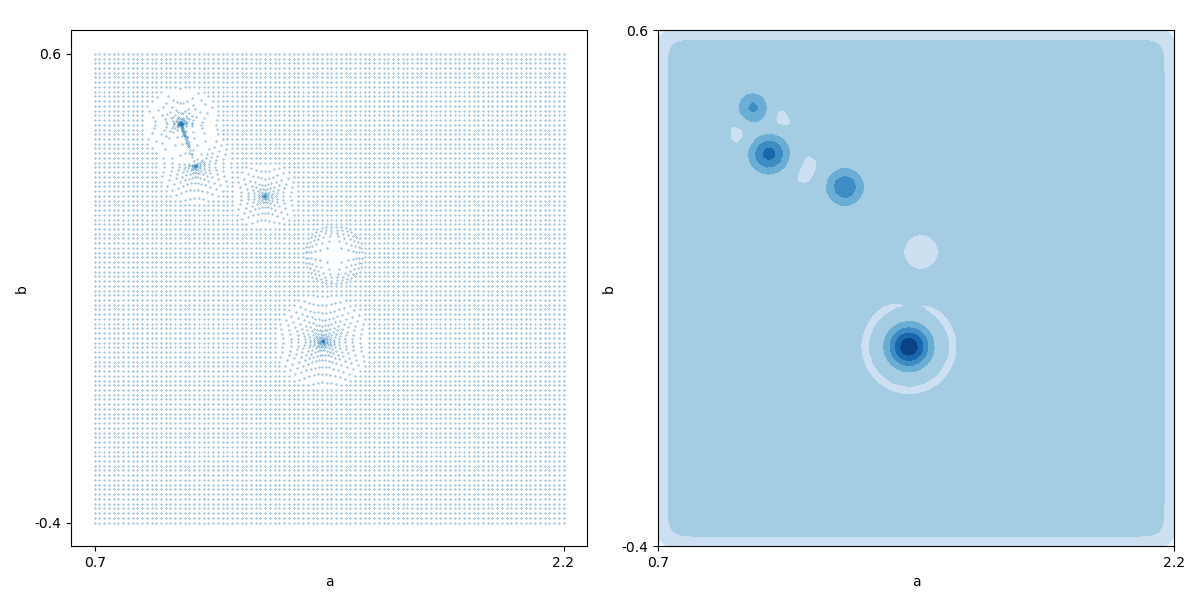

In [38]:
slider1 = sliders.SlidableParameter(0, 0, 1, 0, False, "Linear Space", [])
slider2 = sliders.SlidableParameter(0, 0, 1, 0, False, "Linear Space", [])

poi_list = [sensitivity_calibration.PointOfInterest([0.3620373679707591,0.6962646098392498], radius=0.07, exp=2, repelling=False),                                                                                         
            sensitivity_calibration.PointOfInterest([0.21440352571539195,0.7617193750020977], radius=0.08, exp=2, repelling=False),
            sensitivity_calibration.PointOfInterest([0.4862372670109888,0.3866132207996222], radius=0.1, exp=2, repelling=False),                                                                                             
            sensitivity_calibration.PointOfInterest([0.5096712102261263,0.5703900614491573], radius=0.065, exp=2, repelling=True),
            sensitivity_calibration.PointOfInterest([0.18393939953571292,0.8498315588751626], radius=0.05, exp=4, repelling=False)]

linspace_kde = list(np.linspace(0, 1, num=2000))
grid = list(product(linspace_kde.copy(), linspace_kde.copy()))
transformed_grid_kde = []
for point in tqdm(grid):
    transformed_grid_kde.append(sensitivity_calibration.transform_custom_values(point, [slider1, slider2], poi_list))

kde = gaussian_kde(np.array(transformed_grid_kde).T)

x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid_points = np.vstack([x.ravel(), y.ravel()])

z = kde(grid_points)

z = z.reshape(x.shape)

linspace_scatter = list(np.linspace(0, 1, num=100))
grid = list(product(linspace_scatter.copy(), linspace_scatter.copy()))
transformed_grid_scatter = []
for point in tqdm(grid):
    transformed_grid_scatter.append(sensitivity_calibration.transform_custom_values(point, [slider1, slider2], 
                                                                            [sensitivity_calibration.PointOfInterest([0.3620373679707591,0.6962646098392498], radius=0.07, exp=2, repelling=False),                                                                                         
                                                                             sensitivity_calibration.PointOfInterest([0.21440352571539195,0.7617193750020977], radius=0.08, exp=2, repelling=False),
                                                                             sensitivity_calibration.PointOfInterest([0.4862372670109888,0.3866132207996222], radius=0.1, exp=2, repelling=False),                                                                                             
                                                                             sensitivity_calibration.PointOfInterest([0.5096712102261263,0.5703900614491573], radius=0.065, exp=2, repelling=True),
                                                                             sensitivity_calibration.PointOfInterest([0.18393939953571292,0.8498315588751626], radius=0.08, exp=4, repelling=False)]))
scatter_x = np.array([grid_point[0] for grid_point in transformed_grid_scatter])
scatter_y = np.array([grid_point[1] for grid_point in transformed_grid_scatter])                                              




fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[1].contourf(x, y, z, cmap='Blues')
axs[1].set_xticks(ticks=[0, 1], labels=['0.7', '2.2'])
axs[1].set_yticks(ticks=[0, 1], labels=['-0.4', '0.6'])
axs[1].set_aspect('equal')
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')

axs[0].scatter(scatter_x, scatter_y, s=0.08)
axs[0].set_xticks(ticks=[0, 1], labels=['0.7', '2.2'])
axs[0].set_yticks(ticks=[0, 1], labels=['-0.4', '0.6'])
axs[0].set_aspect('equal')
axs[0].set_xlabel('a')
axs[0].set_ylabel('b')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

Starting sclang process... [sclang | start reading ]
Done.
Registering OSC /return callback in sclang... Done.
Loading default sc3nb SynthDefs... Done.
Booting SuperCollider Server... [scsynth | start reading ]
Done.


Compute time series:: 1000it [05:12,  3.20it/s]
Compute box dim: 100%|██████████████| 1000000/1000000 [15:23<00:00, 1082.44it/s]
Compute time series:: 1000it [05:18,  3.14it/s]
Compute box dim: 100%|██████████████| 1000000/1000000 [15:47<00:00, 1055.83it/s]


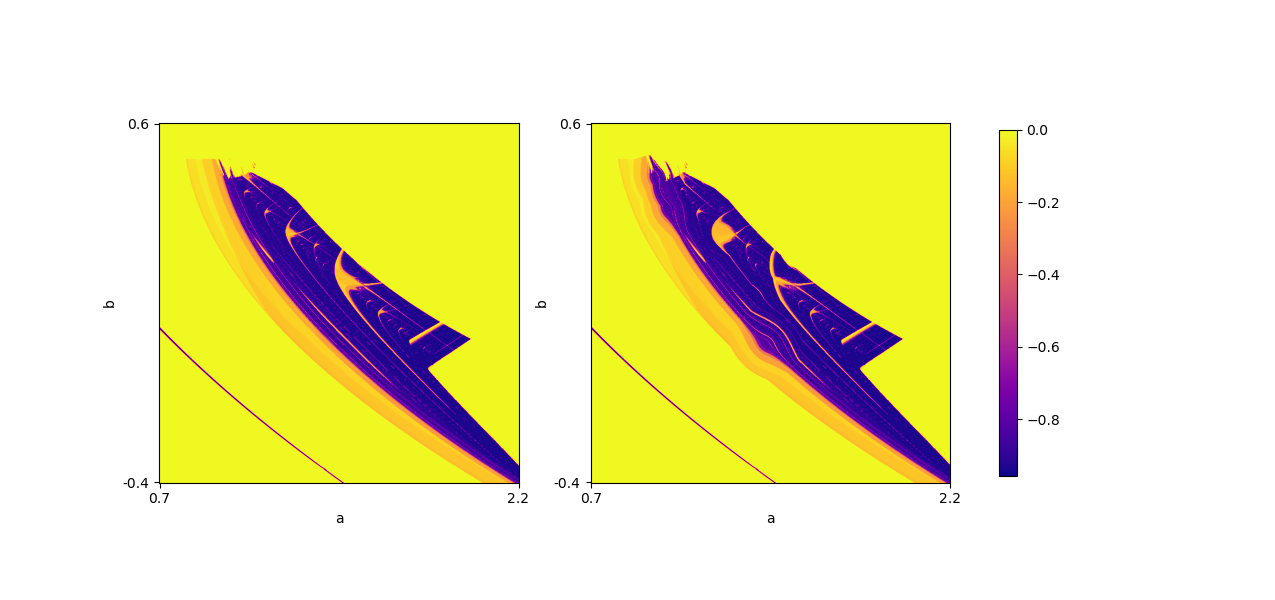

In [37]:
input_device = 'ZoomAudio' # change to your needs (For mac: if through Zoom, set to 'ZoomAudio')
output_device = 'ZoomAudio'# change to your needs
pychaos = pychaoson.startup(input_device, output_device, data_path=None, samples_path=None)
hennon_map = chaotic_systems.HennonMap()
synth = pychaos.start_synth("Hennon Map", "Granular", "PnoHarpStrumMono")
points = 1000

box_count_dim_no_transform, _ = calc_chaos.dimension_analysis(pychaos, hennon_map, [0,1], points_per_dim=points,
                                 take_num=1000, take_last=True, method='box_count_dim', custom_transform=None, save=False)

synth.add_poi([0.3620373679707591,0.6962646098392498], radius=0.07, exp=2, normalize=False, repelling=False)
synth.add_poi([0.21440352571539195,0.7617193750020977], radius=0.08, exp=2, normalize=False, repelling=False)
synth.add_poi([0.4862372670109888,0.3866132207996222], radius=0.1, exp=2, normalize=False, repelling=False)
synth.add_poi([0.5096712102261263,0.5703900614491573], radius=0.065, exp=2, normalize=False, repelling=True)
synth.add_poi([0.18393939953571292,0.8498315588751626], radius=0.08, exp=2, normalize=False, repelling=False)
        
    
box_count_dim_transform, _ = calc_chaos.dimension_analysis(pychaos, hennon_map, [0,1], points_per_dim=points,
                                 take_num=1000, take_last=True, method='box_count_dim', custom_transform=None, save=False)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.75, 6))

# Plot the first heatmap in the first subplot
box_count_dim_no_transform = np.swapaxes(box_count_dim_no_transform, 0, 1)
im = axs[0].imshow(box_count_dim_no_transform, cmap='plasma', aspect='auto', origin='lower')
axs[0].set_xticks(ticks=[0, points-1], labels=['0.7', '2.2'])
axs[0].set_yticks(ticks=[0, points-1], labels=['-0.4', '0.6'])
axs[0].set_aspect('equal')
axs[0].set_xlabel('a')
axs[0].set_ylabel('b')

# Plot the second heatmap in the second subplot
box_count_dim_transform = np.swapaxes(box_count_dim_transform, 0, 1)
im = axs[1].imshow(box_count_dim_transform, cmap='plasma', aspect='auto', origin='lower')
axs[1].scatter(np.array([0.3620373679707591, 0.21440352571539195, 0.4862372670109888, 0.5096712102261263, 0.18393939953571292])* 1000,
               np.array([0.6962646098392498, 0.7617193750020977, 0.3866132207996222, 0.5703900614491573, 0.8498315588751626]) * 1000,c='gray', s=15, alpha=0.55)
axs[1].set_xticks(ticks=[0, points-1], labels=['0.7', '2.2'])
axs[1].set_yticks(ticks=[0, points-1], labels=['-0.4', '0.6'])
axs[1].set_aspect('equal')
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.75)

plt.show()

In [36]:
pychaos.stop()

Quitting SCServer... Done.
Exiting sclang... [scsynth | reached EOF ]
[sclang | reached EOF ]
Done.


### Example for 1D Density Estimation

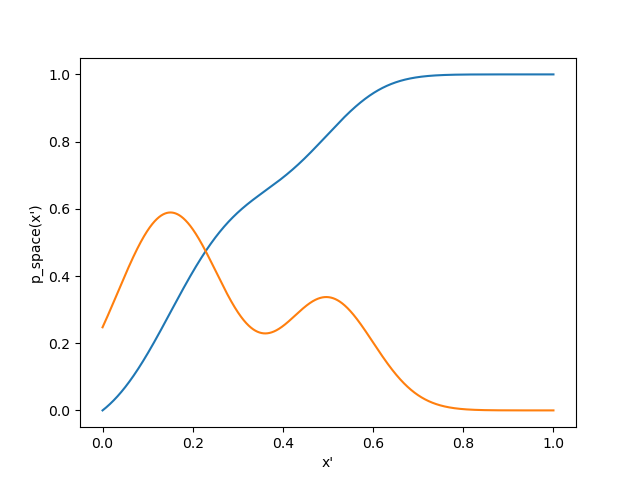

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def density(x, points, std, factor):
    return sum([np.exp(-(1/2)*np.power(factor * (x - point) / std,2)) for point in points])

linspace = np.linspace(0,1, 10000)
densitiy_array = np.divide(density(linspace, [0.1, 0.2,0.5],0.1, 1), 3)

result_array = np.cumsum(densitiy_array)
#move to zero
result_array = np.subtract(result_array, result_array[0])
# normalize to 0 - 1

result_array = np.divide(result_array, result_array[-1])
plt.figure()
plt.plot(result_array)
plt.plot(densitiy_array)

# interpolate
func = interpolate.interp1d(result_array, linspace)

plt.ylabel('p_space(x\')')
plt.xlabel('x\'')
plt.xticks(ticks=[0, 2000, 4000, 6000, 8000,10000], labels=['0.0', '0.2','0.4','0.6','0.8','1.0'])
plt.show()

### Example for adding multiple 2D gaussians densities together

100%|███████████████████████████████████| 40000/40000 [00:07<00:00, 5502.69it/s]


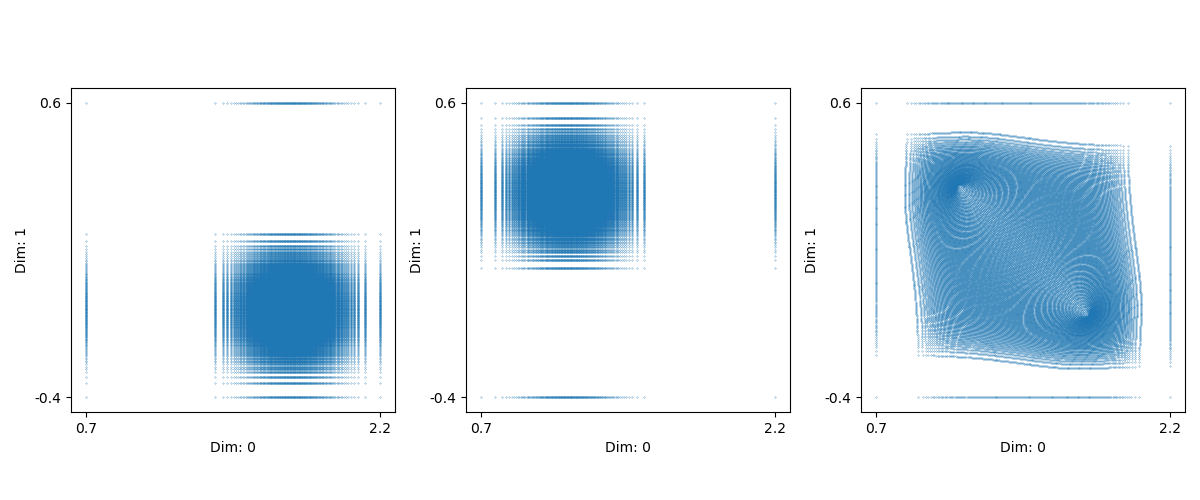

In [9]:
def density(x, points, std, factor):
    re = sum([np.exp(-(1/2)*np.power(factor * (np.linalg.norm(np.subtract(x,point))) / std,2)) for point in points])
    return re

linspace = np.linspace(0,1, 200)
grid_density_p1 = np.zeros((200,200))
grid_density_p2 = np.zeros((200,200))

for i in range(200):
    for j in range(200):
        grid_density_p1[i, j] = density(np.array([linspace[i], linspace[j]]), [np.array([0.3,0.7])],0.1, 1)
        grid_density_p2[i, j] = density(np.array([linspace[i], linspace[j]]), [np.array([0.7,0.3])],0.1, 1)

cumsum_y_p1 = np.cumsum(np.sum(grid_density_p1, axis=1))
cumsum_y_p1 = cumsum_y_p1 - cumsum_y_p1[0]
cumsum_y_p1 = cumsum_y_p1 / cumsum_y_p1[-1]
cumsum_x_p1 = np.cumsum(np.sum(grid_density_p1, axis=0))
cumsum_x_p1 = cumsum_x_p1 - cumsum_x_p1[0]
cumsum_x_p1 = cumsum_x_p1 / cumsum_x_p1[-1]
cumsum_y_p2 = np.cumsum(np.sum(grid_density_p2, axis=1))
cumsum_y_p2 = cumsum_y_p2 - cumsum_y_p2[0]
cumsum_y_p2 = cumsum_y_p2 / cumsum_y_p2[-1]
cumsum_x_p2 = np.cumsum(np.sum(grid_density_p2, axis=0))
cumsum_x_p2 = cumsum_x_p2 - cumsum_x_p2[0]
cumsum_x_p2 = cumsum_x_p2 / cumsum_x_p2[-1]

func_x_p1 = interpolate.interp1d(cumsum_x_p1, linspace)
func_y_p1 = interpolate.interp1d(cumsum_y_p1, linspace)
func_x_p2 = interpolate.interp1d(cumsum_x_p2, linspace)
func_y_p2 = interpolate.interp1d(cumsum_y_p2, linspace)

def compute_transform(point):
    dist1 = np.linalg.norm(np.subtract(point, [0.3, 0.7]))
    dist2 = np.linalg.norm(np.subtract(point, [0.7, 0.3]))
    perc1 = ((dist1/(abs(dist1 + dist2))))
    perc2 = ((dist2/(abs(dist1 + dist2))))
    delta_p1 = np.subtract([func_x_p1(point[0]), func_y_p1(point[1])], point) * perc1**0.8
    delta_p2 = np.subtract([func_x_p2(point[0]), func_y_p2(point[1])], point) * perc2**0.8
    return np.add(point, np.add(delta_p1, delta_p2)/2)

grid = np.array(list(product(linspace.copy(), linspace.copy())))
transformed_grid_p1 = []
transformed_grid_p2 = []
transformed_grid_avg = []
for point in tqdm(grid):
    compute_transform(point)
    transformed_grid_avg.append(compute_transform(point))
    transformed_grid_p1.append([func_x_p1(point[0]), func_y_p1(point[1])])
    transformed_grid_p2.append([func_x_p2(point[0]), func_y_p2(point[1])])

scatter_x_p1 = np.array([grid_point[0] for grid_point in transformed_grid_p1])
scatter_y_p1 = np.array([grid_point[1] for grid_point in transformed_grid_p1])
scatter_x_p2 = np.array([grid_point[0] for grid_point in transformed_grid_p2])
scatter_y_p2 = np.array([grid_point[1] for grid_point in transformed_grid_p2])
scatter_x_avg = np.array([grid_point[0] for grid_point in transformed_grid_avg])
scatter_y_avg = np.array([grid_point[1] for grid_point in transformed_grid_avg])
scatter_x_grid = np.array([grid_point[0] for grid_point in grid])
scatter_y_grid = np.array([grid_point[1] for grid_point in grid])

# Reshape the result to match the grid shape\
#z = z.reshape(x.shape)
# Plot the 2D KDE
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].scatter(scatter_x_p1, scatter_y_p1, s=0.05)
axs[1].scatter(scatter_x_p2, scatter_y_p2, s=0.05)
axs[2].scatter(scatter_x_avg, scatter_y_avg, s=0.05)
#plt.plot(cumsum_x)
axs[0].set_aspect('equal')
axs[0].set_xticks(ticks=[0, 1], labels=['0.7', '2.2'])
axs[0].set_yticks(ticks=[0, 1], labels=['-0.4', '0.6'])
axs[0].set_xlabel('a')
axs[0].set_ylabel('B')
axs[1].set_aspect('equal')
axs[1].set_xticks(ticks=[0, 1], labels=['0.7', '2.2'])
axs[1].set_yticks(ticks=[0, 1], labels=['-0.4', '0.6'])
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')
axs[2].set_aspect('equal')
axs[2].set_xticks(ticks=[0, 1], labels=['0.7', '2.2'])
axs[2].set_yticks(ticks=[0, 1], labels=['-0.4', '0.6'])
axs[2].set_xlabel('a')
axs[2].set_ylabel('b')
fig.tight_layout()
plt.show()

### Plot Heatmap of box-count dimension for the summed gaussian as above

<IPython.core.display.Javascript object>

Starting sclang process... [sclang | start reading ]
Done.
Registering OSC /return callback in sclang... Done.
Loading default sc3nb SynthDefs... Done.
Booting SuperCollider Server... [scsynth | start reading ]
Done.


Compute time series:: 1000it [05:10,  3.22it/s]
Compute box dim: 100%|██████████████| 1000000/1000000 [15:31<00:00, 1073.10it/s]
Compute time series:: 1000it [05:17,  3.15it/s]
Compute box dim: 100%|██████████████| 1000000/1000000 [15:41<00:00, 1061.93it/s]
/var/folders/d5/mnx609gj2v9c9yfwqc16_0vm0000gp/T/ipykernel_52382/2207824364.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.75, 6))


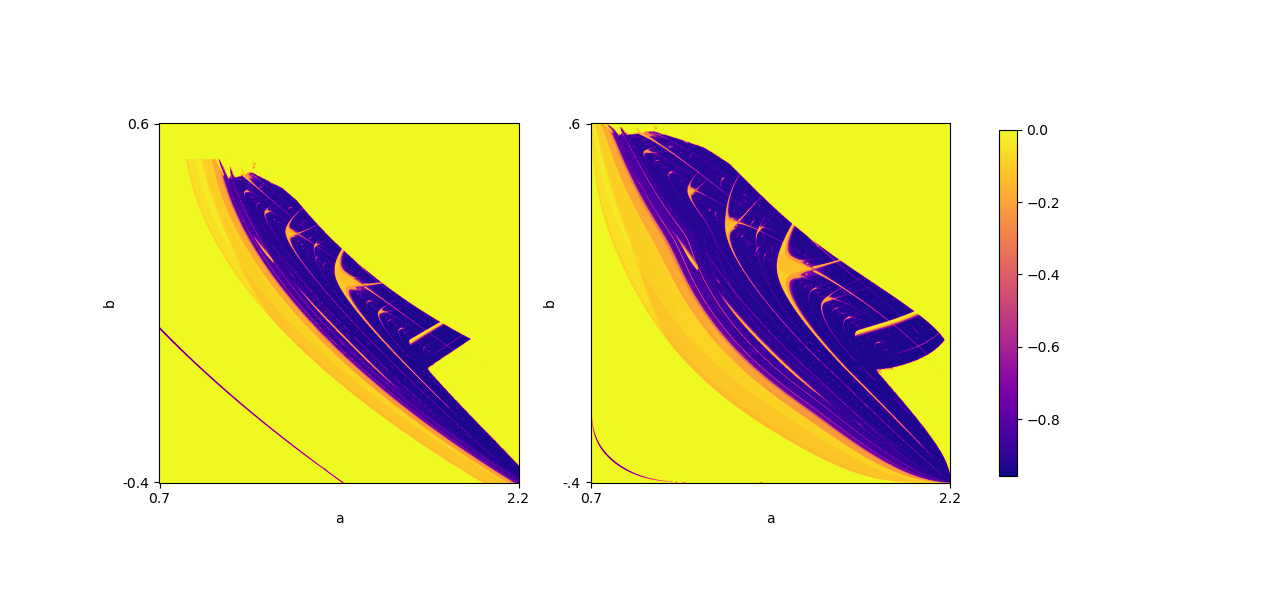

In [43]:
input_device = 'ZoomAudio' # change to your needs (For mac: if through Zoom, set to 'ZoomAudio')
output_device = 'ZoomAudio'# change to your needs
pychaos = pychaoson.startup(input_device, output_device, data_path=None, samples_path=None)
hennon_map = chaotic_systems.HennonMap()
pychaos.start_synth("Hennon Map", "Granular", "PnoHarpStrumMono")
points = 1000

box_count_dim_no_transform, _ = calc_chaos.dimension_analysis(pychaos, hennon_map, [0,1], points_per_dim=points,
                                 take_num=1000, take_last=True, method='box_count_dim', custom_transform=None, save=False)

param_space = hennon_map.get_param_space()
def custom_transform(param_combinations):
    new_combinations = []
    for param_combination in param_combinations:
        norm_combination = [sensitivity_calibration.__normalize__(param_combination[i],param_space[i][1],param_space[i][2]) for i in range(len(param_space))]
        distorted_norm_combination = compute_transform(norm_combination)
        denorm_combination = [sensitivity_calibration.__denormalize__(distorted_norm_combination[i],param_space[i][1],param_space[i][2]) for i in range(len(param_space))]
        new_combinations.append(denorm_combination)
    return new_combinations
        
    
box_count_dim_transform, _ = calc_chaos.dimension_analysis(pychaos, hennon_map, [0,1], points_per_dim=points,
                                 take_num=1000, take_last=True, method='box_count_dim', custom_transform=custom_transform, save=False)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.75, 6))

# Plot the first heatmap in the first subplot
box_count_dim_no_transform = np.swapaxes(box_count_dim_no_transform, 0, 1)
im = axs[0].imshow(box_count_dim_no_transform, cmap='plasma', aspect='auto', origin='lower')
axs[0].set_xticks(ticks=[0, points-1], labels=['0.7', '2.2'])
axs[0].set_yticks(ticks=[0, points-1], labels=['-0.4', '0.6'])
axs[0].set_aspect('equal')
axs[0].set_xlabel('a')
axs[0].set_ylabel('b')

# Plot the second heatmap in the second subplot
box_count_dim_transform = np.swapaxes(box_count_dim_transform, 0, 1)
im = axs[1].imshow(box_count_dim_transform, cmap='plasma', aspect='auto', origin='lower')
axs[1].set_xticks(ticks=[0, points-1], labels=['0.7', '2.2'])
axs[1].set_yticks(ticks=[0, points-1], labels=['-.4', '.6'])
axs[1].set_aspect('equal')
axs[1].set_xlabel('a')
axs[1].set_ylabel('b')
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.75)
# Adjust spacing between subplots
#plt.tight_layout()

# Display the plot
plt.show()

In [42]:
pychaos.stop()

Quitting SCServer... Done.
Exiting sclang... [scsynth | reached EOF ]
[sclang | reached EOF ]
Done.


### Example for dependent variables in 2d space (Not used in ba but good visualization what happens when the variables are dependent)

100%|██████████████████████████████████| 40000/40000 [00:00<00:00, 79143.67it/s]


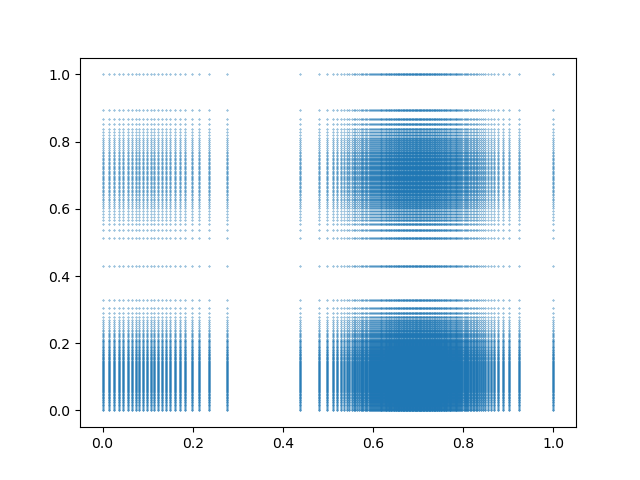

In [45]:
def density(x, points, std, factor):
    re = sum([np.exp(-(1/2)*np.power(factor * (np.linalg.norm(np.subtract(x,point))) / std,2)) for point in points])
    return re

def multidim_cumsum(a):
    out = a[...,::-1].cumsum(-1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

linspace = np.linspace(0,1, 200)
grid_density = np.zeros((200,200))
for i in range(200):
    for j in range(200):
        grid_density[i, j] = density(np.array([linspace[i], linspace[j]]), [np.array([0.1,0.1]), np.array([0.7,0.7])],0.09, 1)



cumsum = multidim_cumsum(grid_density)

marginal_cdf_x = np.sum(cumsum, axis=1)
min_value = marginal_cdf_x[0]
marginal_cdf_x = marginal_cdf_x - min_value
marginal_cdf_x = marginal_cdf_x / marginal_cdf_x.copy()[-1]

# Calculate the marginalized cumulative sum along the y-axis (marginal CDF for x)
marginal_cdf_y = np.sum(cumsum, axis=0)
min_value = marginal_cdf_y[0]
marginal_cdf_y = marginal_cdf_y - min_value
marginal_cdf_y = marginal_cdf_y/marginal_cdf_y.copy()[-1]


func_x = interpolate.interp1d(marginal_cdf_x, linspace)
func_y = interpolate.interp1d(marginal_cdf_y, linspace)

##
assert grid_density(0.3) * func_y(0.3)!= grid_density

grid = np.array(list(product(linspace.copy(), linspace.copy())))
transformed_grid = []
for point in tqdm(grid):
    transformed_grid.append([func_x(point[0]), func_y(point[1])])

scatter_x = np.array([grid_point[0] for grid_point in transformed_grid])
scatter_y = np.array([grid_point[1] for grid_point in transformed_grid])

# Reshape the result to match the grid shape\
#z = z.reshape(x.shape)
# Plot the 2D KDE
plt.figure()
plt.scatter(scatter_x, scatter_y, s=0.1)
plt.show()
#plt.xlabel('Dim: 0')
#plt.ylabel('Dim: 1')

In [51]:
points = [[0,0],[0,1],[1,0],[1,1], [0.5,0.5], [1,0.5],[0,0.5],[0.5,1],[0.5,0]]
mu = [[0,0],[1,1]]
std = 1

xy_density = []
for point in points:
    xy_density.append(density(points, mu, std, 1))

combined = xy_density[5]
marginalized = (xy_density[8] + xy_density[7] + xy_density[4]) * (xy_density[6] + xy_density[5] + xy_density[4]) 
print(combined)
print(marginalized)

0.047035491712018214
0.01991103732532201
